# 과제1. 직원 이직 분석

* 회사 인사팀에서는 AIVLER 들에게 직원의 이직여부과 관련해서 분석을 요청하였습니다.
* 최근 이직율이 증가하는 것에 대해 우려를 갖고 있기에, 이직여부에 영향을 주는 요인에 대해 분석하여, 직원들이 회사를 떠나지 않도록 인사 프로그램을 준비하려고 합니다.
* 필요하다면, 검색을 통해 '직원이 회사를 떠나는 이유' 등을 찾아보는 것은 데이터 분석을 하는데 도움이 될 것입니다.
* 자, 이제 인사팀에서 제공한 데이터를 바탕으로 각각 개별 변수의 분포를 살펴보며, 비즈니스 인사이트를 최대한 도출해 봅시다.


![](https://adoptostaging.blob.core.windows.net/media/employee-attrition-reasons-9LIqMv.jpg)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [48]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_NA.CSV"
data = pd.read_csv(path)
data.drop(['EducationField', 'Education','JobInvolvement', 'StockOptionLevel', 'BusinessTravel','YearsWithCurrManager'
,'YearsInCurrentRole','JobRole', 'Department','EmployeeNumber','EnvironmentSatisfaction','TrainingTimesLastYear','YearsAtCompany']
          , axis = 1, inplace = True)
data['Attrition'] = np.where(data['Attrition']=='Yes', 1, 0)
data.head(10)

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance
0,0,33,7.0,Male,3,Married,11691,0.0,No,11,4,14,4
1,0,35,18.0,Male,4,Single,9362,2.0,No,11,3,10,3
2,0,42,6.0,Male,1,Married,13348,9.0,No,13,2,18,4
3,0,46,2.0,Female,1,Married,17048,8.0,No,23,1,28,3
4,0,39,NaN,Male,4,Divorced,4127,2.0,No,18,4,7,3
5,1,22,4.0,Male,3,Single,3894,5.0,No,16,3,4,3
6,0,24,21.0,Male,1,Divorced,2296,0.0,No,14,2,2,3
7,0,34,8.0,Male,3,Married,4404,2.0,No,12,1,6,4
8,0,30,20.0,Male,1,Married,9957,0.0,No,15,3,7,2
9,0,26,6.0,Female,4,Married,2659,1.0,Yes,13,3,3,3


[Attrition 데이터 셋 정보]

구분	     변수 명	        내용	               type	   비고
Target	   Attrition	     이직여부, Yes , No	  범주	1- 이직, 0- 잔류
feature	   Age	             나이	숫자	
feature	   DistanceFromHome	 집-직장 거리	     숫자	   마일
feature	   EmployNumber	     사번	숫자	
feature	   Gender	         성별	                범주	  Male, Female
feature	   JobSatisfaction	 직무 만족도	         범주	1 Low, 2 Medium, 3 High, 4 Very High
feature	   MaritalStatus	 결혼상태	          범주	Single, Married, Divorced
feature	   MonthlyIncome	 월급	                 숫자	달러
feature	   OverTime	         야근여부	           범주	Yes, No
feature	   PercentSalaryHike 전년대비 급여인상율	  숫자	%
feature	   TotalWorkingYears 총 경력 연수	      숫자	


----

## 1.가설수립

* 여기서는 가설을 생략합니다.

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
* (옵션)자료에 대한 가정 검정.(정규성, 등분산성 등)

### (1) 범주형 Feature --> Target
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

#### 1) Gender --> Attrition

① 교차표(pd.crosstab())

In [6]:
pd.crosstab(data['Attrition'], data['Gender'], normalize='columns')

Gender,Female,Male
Attrition,,
0,0.859184,0.827632
1,0.140816,0.172368


② 시각화( Stacked Bar, Mosaic)

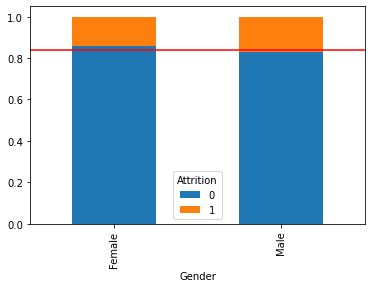

In [9]:
target_mean=data['Attrition'].mean()

temp = pd.crosstab(data['Gender'], data['Attrition'], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-target_mean, color = 'r')
plt.show()

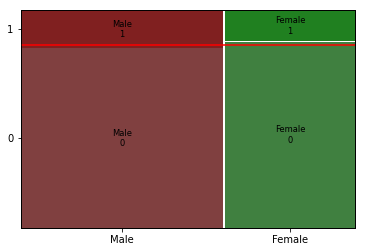

In [10]:
mosaic(data, ['Gender' , 'Attrition'])
plt.axhline(1- target_mean, color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

In [ ]:
이직한 사람이 이직을 안 한 사람보다 훨씬 적다.
미세한 차이로 남자보다 여자가 이직을 덜 했다.

③ 가설검정(카이제곱검정)

In [11]:
table = pd.crosstab(data['Attrition'], data['Gender'])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

카이제곱통계량 1.9782495940105371
p-value 0.15957492990528155


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

In [ ]:
p값으로 보아 성별에 따른 이직률은 유의하지 않음이 판별났다.
시각화를 통해서도 보이는 차이가 크지 않았기에 남 녀 로만 본다면 관련성이 낮다.
하지만, 성별과 나이대, 결혼 여부로 보면 이직률에 미치는 영향이 달라지지 않을까 생각이 든다.

#### 2) MaritalStatus --> Attrtion

① 교차표(pd.crosstab())

In [12]:
pd.crosstab(data['Attrition'], data['MaritalStatus'], normalize='columns')

MaritalStatus,Divorced,Married,Single
Attrition,,,
0,0.916667,0.878947,0.732673
1,0.083333,0.121053,0.267327


② 시각화( Stacked Bar, Mosaic)

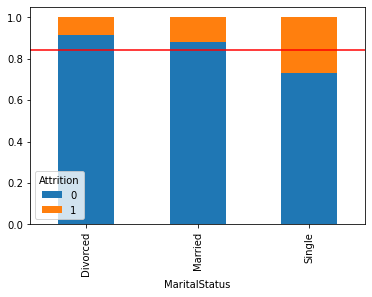

In [13]:
target_mean=data['Attrition'].mean()

temp = pd.crosstab(data['MaritalStatus'], data['Attrition'], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-target_mean, color = 'r')
plt.show()

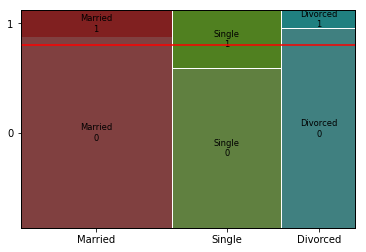

In [14]:
mosaic(data, ['MaritalStatus' , 'Attrition'])
plt.axhline(1- target_mean, color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

In [ ]:
데이터는 기혼 > 미혼 > 이혼이 가장 많았으며
이직은 미혼 > 기혼 > 이혼순으로 이직률이 높았다.


③ 가설검정(카이제곱검정)

In [15]:
table = pd.crosstab(data['Attrition'], data['MaritalStatus'])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

카이제곱통계량 53.12935546374186
p-value 2.9047385436211595e-12


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

In [ ]:
p값이 0.05보다 작으므로 결혼여부와 이직률은 관계가 있다.

미혼이 기혼보다 이직률이 높은 이유는 아직 가정의 책임감이 혼자이기때문에
더 자유롭게 이직하고, 기혼은 안정적인 수입이 우선이기 때문에 이직률이 
기혼보다 낮다고 생각한다. 그리고 기혼일때 이미 이직하고, 더 나은 상황일때
결혼을 했을 가능성도 있다고 생각한다. 
    -이 예상으로 결혼 여부와 연봉을 비교해 볼 필요가 있다.

기혼보다 이혼 이직률이 낮은 이유는 결혼 후 이혼이면 나이도 꽤 있고, 
오로지 자신만이 돈을 번다. 심지어 아이가 있다면 더욱 경제적인 부담이 크기때문에
나이로 이직도 어렵고, 혼자 벌어서 가정을 책임지려면 안정적인 수입이 필요하다고 생각했다.
    -이 예상으로 결혼 여부와 나이를 비교해 볼 필요가 있다.

#### 3) JobSatisfaction --> Attrtion

① 교차표(pd.crosstab())

In [16]:
pd.crosstab(data['Attrition'], data['JobSatisfaction'], normalize='columns')

JobSatisfaction,1,2,3,4
Attrition,,,,
0,0.788,0.834043,0.836957,0.879093
1,0.212,0.165957,0.163043,0.120907


② 시각화( Stacked Bar, Mosaic)

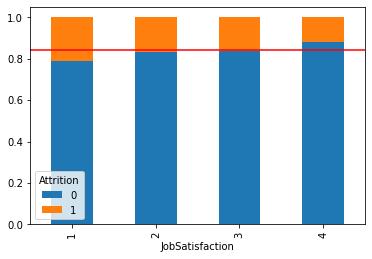

In [17]:
target_mean=data['Attrition'].mean()

temp = pd.crosstab(data['JobSatisfaction'], data['Attrition'], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-target_mean, color = 'r')
plt.show()

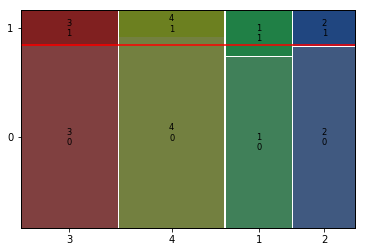

In [18]:
mosaic(data, ['JobSatisfaction' , 'Attrition'])
plt.axhline(1- target_mean, color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

In [ ]:
만족도가 높을 수록 이직률이 낮고 2,3은 이직률이 비슷하다.

③ 가설검정(카이제곱검정)

In [19]:
table = pd.crosstab(data['Attrition'], data['JobSatisfaction'])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

카이제곱통계량 9.63151465436614
p-value 0.021972649369306214


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

In [ ]:
p값으로 만족도에 따른 이직률은 관계가 유의하다.
하지만, 개인적인 생각과 그래프를 관찰시 만족도가 높을수록 이직률이 낮을 것이라 생각한다.
-다른 요소( 연봉, 나이, 거리 등의 요소와 함께 비교해봐야할것같다.)

#### 4) 추가 --> Attrtion

① 교차표(pd.crosstab())

In [32]:
pd.crosstab(data['Attrition'], data['RelationshipSatisfaction'], normalize='columns')

RelationshipSatisfaction,1,2,3,4
Attrition,,,,
0,0.795652,0.841085,0.848866,0.857534
1,0.204348,0.158915,0.151134,0.142466


② 시각화( Stacked Bar, Mosaic)

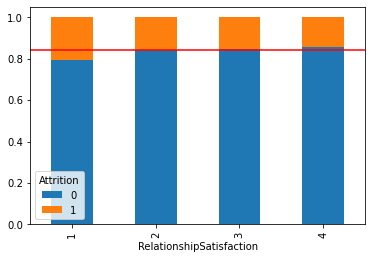

In [33]:
target_mean=data['Attrition'].mean()

temp = pd.crosstab(data['RelationshipSatisfaction'], data['Attrition'], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-target_mean, color = 'r')
plt.show()

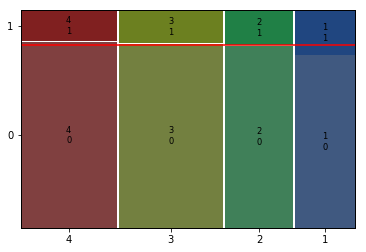

In [34]:
mosaic(data, ['RelationshipSatisfaction' , 'Attrition'])
plt.axhline(1- target_mean, color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

In [ ]:
미세하지만 대인관계가 좋을수록 이직률이 낮은것을 관찰할 수 있다.

③ 가설검정(카이제곱검정)

In [35]:
table = pd.crosstab(data['Attrition'], data['RelationshipSatisfaction'])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

카이제곱통계량 4.435126158518535
p-value 0.2181503949975081


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

In [ ]:
p값으로 보면 대인관계와 이직률은 관련없다는 결론이 나온다.
그러나 시각화로 보면 미세하지만 대인관계가 좋을수록 이직률이 낮은것을 관찰할 수 있다.
이를 보아 대인관계가 직업 만족도에 영향을 미치지 않을까 생각한다.

In [53]:
data['JobSat2'] = np.where( data['JobSatisfaction'].isin([1,2]), 'unsat'  , 'sat' )
data.head()

tmp = data.groupby(['RelationshipSatisfaction','JobSat2'], as_index = False)[['MonthlyIncome']].mean()
tmp

,RelationshipSatisfaction,JobSat2,MonthlyIncome
0,1,sat,6253.141844
1,1,unsat,6192.842697
2,2,sat,6469.031646
3,2,unsat,6994.180000
4,3,sat,6399.341365
5,3,unsat,6675.006757
6,4,sat,6667.792627
7,4,unsat,6583.148649


#### 5) 추가 --> Attrtion

① 교차표(pd.crosstab())

In [36]:
pd.crosstab(data['Attrition'], data['WorkLifeBalance'], normalize='columns')

WorkLifeBalance,1,2,3,4
Attrition,,,,
0,0.710145,0.845118,0.855422,0.810219
1,0.289855,0.154882,0.144578,0.189781


② 시각화( Stacked Bar, Mosaic)

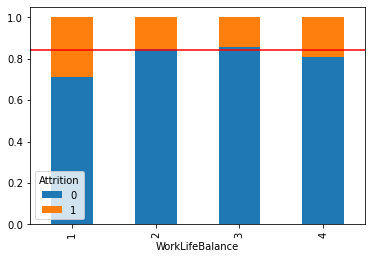

In [37]:
target_mean=data['Attrition'].mean()

temp = pd.crosstab(data['WorkLifeBalance'], data['Attrition'], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-target_mean, color = 'r')
plt.show()

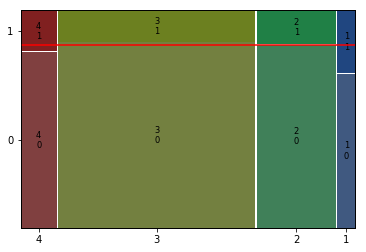

In [38]:
mosaic(data, ['WorkLifeBalance' , 'Attrition'])
plt.axhline(1- target_mean, color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

In [ ]:
놀랍게 만족도가 best인데 이직률이 평균보다 높은 것을 볼 수 있다. 
만족도가 가장 낮을 때는 이직률이 평균보다 많이 높다.

③ 가설검정(카이제곱검정)

In [39]:
table = pd.crosstab(data['Attrition'], data['JobSatisfaction'])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

카이제곱통계량 9.63151465436614
p-value 0.021972649369306214


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

In [ ]:
0.05 이상으로 워라밸에 따른 이직률은 관계 없지만
다른 요소와 함께 볼 필요가 있을것같다.


In [50]:
data['JobSat2'] = np.where( data['JobSatisfaction'].isin([1,2]), 'unsat'  , 'sat' )
data.head()

tmp = data.groupby(['WorkLifeBalance','JobSat2'], as_index = False)[['MonthlyIncome']].mean()
tmp

,WorkLifeBalance,JobSat2,MonthlyIncome
0,1,sat,5786.621622
1,1,unsat,5872.312500
2,2,sat,6199.592784
3,2,unsat,6689.398058
4,3,sat,6472.525612
5,3,unsat,6726.969799
6,4,sat,7307.729412
7,4,unsat,6369.788462


### (2) 숫자형 Feature --> target

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) Age --> Attrtion


① 그래프 : histogram, densityplot

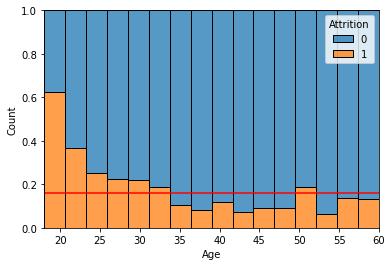

In [21]:
sns.histplot(x='Age', data = data, hue = 'Attrition', multiple = 'fill', bins = 16)
plt.axhline(target_mean, color = 'r')
plt.show()

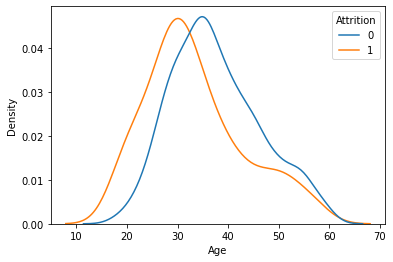

In [22]:
sns.kdeplot(x='Age', data = data, hue ='Attrition', common_norm=False)
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

30 초반 이전까지 이직률과 50대의 이직률은 평균보다 높다.

② 수치화 : 로지스틱회귀

In [24]:
temp = data.loc[data['Age'].notnull()]

model = sm.Logit(temp['Attrition'], temp['Age'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.424660
         Iterations 5
Age    4.667821e-100
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

p값이 0.05보다 작고 0에 가까우므로 나이에 따른 이직률은 관계가 있다.


그래프를 보면 30대 이하는 이직률이 평균보다 높은 것을 볼 수 있다. 
또한, 50대에 평균보다 이직률이 높다.
이를 보아, 나이가 어릴수록 이직하기에 덜 부담이 된다고 생각한다.
30을 넘어가며 직장에 대한 확신이나 안정이 됐기에 
이직률이 감소한다고 생각한다.

50대에 이직률이 평균보다 높은 것은 구조조정이나 스카웃으로 다른 회사로 갈 수 있는 정년전 나이라 생각하기 때문이다.

#### 2) DistanceFromHome --> Attrtion


① 그래프 : histogram, densityplot

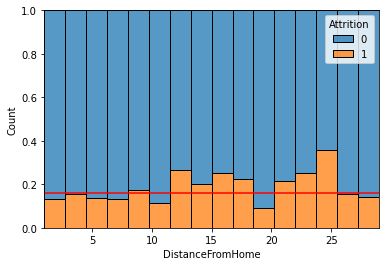

In [29]:
sns.histplot(x='DistanceFromHome', data = data, hue = 'Attrition', multiple = 'fill', bins = 16)
plt.axhline(target_mean, color = 'r')
plt.show()

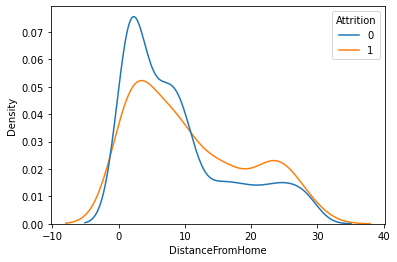

In [52]:
sns.kdeplot(x='DistanceFromHome', data = data, hue ='Attrition', common_norm=False)
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

거리가 12를 넘어가면 이직률이 높은 것을 관찰 가능.
예외로 거리가 20일때와  25 이상일때는 이직률이 평균보다 낮은것을 볼 수 있다.


② 수치화 : 로지스틱회귀

In [31]:
temp = data.loc[data['DistanceFromHome'].notnull()]

model = sm.Logit(temp['Attrition'], temp['DistanceFromHome'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.568793
         Iterations 6
DistanceFromHome    2.694280e-44
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

p값이 0.05이하임으로 거리와 이직률은 관계가 있으나 강한 관계는 아니다.

그래프를 보면 거리가 10 정도 일때는 자가용이든 대중교통이든 걸리는 시간에 만족한다고 생각한다. 그러나 20일때는 자가용을 마련해서 적당히 타협선을 찾은 것이고 그 이후에는 아무리 생각해도 너무 오래 걸린다고 생각하는것같다. 또한 25이후에는 시간은 포기한거같다.

-수입과 함께 비교해보면 아무리 멀어도 포기할 수 없는 수입이 아니지 않을까 생각한다.

#### 3) MonthlyIncome --> Attrtion


① 그래프 : histogram, densityplot

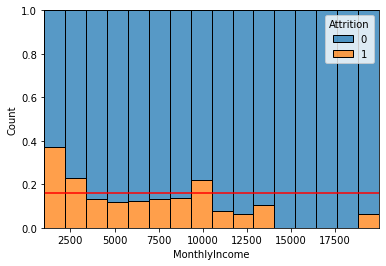

In [25]:
sns.histplot(x='MonthlyIncome', data = data, hue = 'Attrition', multiple = 'fill', bins = 16)
plt.axhline(target_mean, color = 'r')
plt.show()

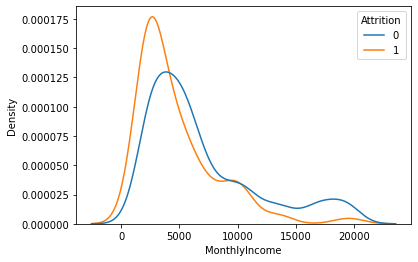

In [26]:
sns.kdeplot(x='MonthlyIncome', data = data, hue ='Attrition', common_norm=False)
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

2500에서 3000까지 월급과 10000 일때는 이직률이 평균보다 낮다. 
밀도함수를 보면 5000정도일때 이직률이 낮아진다.

② 수치화 : 로지스틱회귀

In [28]:
temp = data.loc[data['MonthlyIncome'].notnull()]

model = sm.Logit(temp['Attrition'], temp['MonthlyIncome'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.437401
         Iterations 6
MonthlyIncome    1.922717e-71
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

p값을 보면 0.05이하이고 0에 가까우므로 월급과 이직률은 관계가 있다.
수입이 3000정도까지는 이직률이 높다가 그 이상으로 가면 이직률이 평균보다 낮아지는 것은 아직 수입에 만족을 못하기 때문이라 생각한다.
적당히 만족하는 수입을 받으므로 이직률이 낮아지고 10000일때 이직률이 높은것은 자신의 능력을 보아 10000보다 더 받을 수 있기때문에 돈 더주는 곳으로 이직했을것이라 생각한다. 

#### 4) 추가 --> Attrtion


① 그래프 : histogram, densityplot

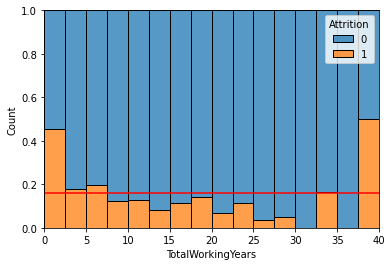

In [40]:
sns.histplot(x='TotalWorkingYears', data = data, hue = 'Attrition', multiple = 'fill', bins = 16)
plt.axhline(target_mean, color = 'r')
plt.show()

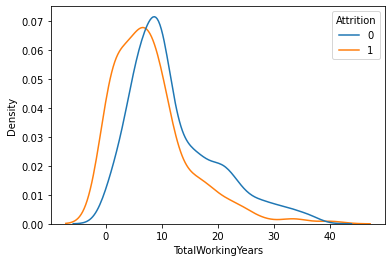

In [41]:
sns.kdeplot(x='TotalWorkingYears', data = data, hue ='Attrition', common_norm=False)
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> 년수가 7년 이하로 낮을때와 40년 이상일때 이직률이 평균보다 높다

② 수치화 : 로지스틱회귀

In [42]:
temp = data.loc[data['TotalWorkingYears'].notnull()]

model = sm.Logit(temp['Attrition'], temp['TotalWorkingYears'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.432906
         Iterations 6
TotalWorkingYears    1.867338e-74
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> p값이 0.05이하로 경력년수와 이직률은 관계가 있다.
경력이 낮을때는 더 나은 회사를 찾아가고 
경력이 어느정도 생겼을때는 현재 다니는 회사의 직책, 연봉이 만족스러워서 이직률이 낮을 것이라 생각한다.
경력이 40년 이상일때는 더 좋은 회사나 자신의 회사를 차리지 않을까 생각이 든다.

#### 5) 추가 --> Attrtion


① 그래프 : histogram, densityplot

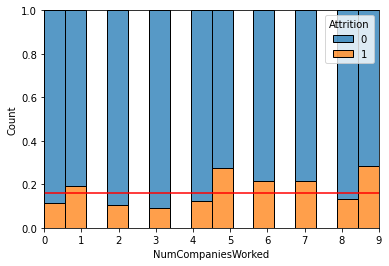

In [43]:
sns.histplot(x='NumCompaniesWorked', data = data, hue = 'Attrition', multiple = 'fill', bins = 16)
plt.axhline(target_mean, color = 'r')
plt.show()

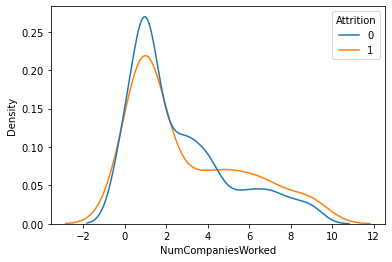

In [44]:
sns.kdeplot(x='NumCompaniesWorked', data = data, hue ='Attrition', common_norm=False)
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

4.5개 이상의 회사를 다닌 사람은 대부분 이직률이 높다.

② 수치화 : 로지스틱회귀

In [45]:
temp = data.loc[data['NumCompaniesWorked'].notnull()]

model = sm.Logit(temp['Attrition'], temp['NumCompaniesWorked'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.564716
         Iterations 6
NumCompaniesWorked    2.545612e-45
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> 계속 계속 이직이 가능한 직종이거나 습관적으로 이직하는것같다.

## 4.관계 정리

### 1) 강한관계의 변수

In [ ]:
수입, 나이

### 2) 중간관계의 변수

In [ ]:
결혼 여부, 직장과의 거리

### 3) (거의)관계 없음

성별, 만족도

## 5. 추가 분석

### 1) 분석1

In [ ]:
대인관계

### 2) 분석2

In [ ]:
워라밸

### 3) 분석3

In [ ]:
년수

### 4) 분석4

In [ ]:
다녀본 회사